# Numerical Methods Project: Vorticies in BEC with Harmonic Trap

The following inmplementation can be found on [GitHub](https://github.com/superporchetta/numerical_methods_project).

In [51]:
%matplotlib inline

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from datetime import datetime


from matplotlib import cm
# custom libraries with all the fucntions used
import plotting_tools as pt
import gross_pitaevskii as gp

All the function that are used to integrate the equations or to calculate phyisical meaningful quantities are contained in `gross_pitaevskii` while the file `plotting_tools` contains many useful functions to generate plots.

For a detailed discussion of the function paramethers we advice to look at the documentation in the function definitions.

In addition here we define some useful functions and variables for later use that will be used later on.

In [22]:
fx = lambda x, y: x
fy = lambda x, y: y
fx2 = lambda x, y: x**2
fy2 = lambda x, y: y**2

Many results from this notebooks can be saved in a subdirectory of the cwd called `test_imgs`. The following lines of code create the directory.

In [459]:
img_path = "/data/imgs"
num_path = "/data/numerical"

try:
    A = os.mkdir(os.getcwd() + img_path)
except FileExistsError as error:
    print('Folder {} already exist.'.format(os.getcwd() + img_path))
    
try:
    A = os.mkdir(os.getcwd() + num_path)
except FileExistsError as error:
    print('Folder {} already exist.'.format(os.getcwd() + num_path))
    
imgs_dir = os.getcwd() + img_path
nums_dir = os.getcwd() + num_path
data_dir = os.getcwd() + "/data"

Folder /Users/matteovilucchio/Documents/ENS/Numerical Methods/numerical_methods_project/data/imgs already exist.
Folder /Users/matteovilucchio/Documents/ENS/Numerical Methods/numerical_methods_project/data/numerical already exist.


And the last thing needed is a function to save the numerical data

In [24]:
def saving_files(path, *arrays, msg=""):
    now = str(datetime.now())[:-7]
    now = now[:-15] + "_" + now[-14:-12] + "_" + now[-11:-9] + "_" + now[-8:-6] + "_" + now[-5:-3] + "_" + now[-2:]

    np.savez(path + "/" + msg + "_" + str(now), *arrays)

## Test of Algorithms from [1.]

The following tests are run like the example **2.I** (pg. 332) in the above mentioned paper.

In the use of this funciton the potential can depend on time (first and second argument are the coordinates and the third one is time). In the following exampe we are looking at the evolution of out initial condition on a constant potential (i.e. an harmonic trap).

In [35]:
x_range = [-8, 8]
eps = 1.0
beta = 2.0
dt = 0.001
dx = 1/32
T = 10.0
N = int(T / dt)
M = int((x_range[1]-x_range[0])/dx)
q = 40
Dt = q*dt

ho_potential = lambda x, y: 0.5*(x**2 + y**2)

def f0(x, y):
    res = np.zeros(x.shape, dtype=complex)
    res = np.exp(-(x**2 + y**2)/(2*eps))
    a = res/np.sqrt(np.pi*eps)
    return a
    
#f0 = lambda x, y: np.exp(-(x**2 + y**2)/(2*eps))/np.sqrt(np.pi*eps)

start_time = time.time()
t, X, Y, psi = gp.ti_tssp_2d_pbc(M, N, q, x_range, x_range, f0, ho_potential, dt, beta, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

[##############################] 100%
--- Evaluated in 73.18 seconds ---


Saving the NumPy data

In [ ]:
saving_files(nums_dir, t_ex_2, X_ex_2, Y_ex_2, psi_ex_2, msg="2D_exact")

In the following we determine the variance of the condensate width in the $x$ and $y$ direction as:
$$
\sigma_x=\sqrt{\langle(x-\langle x \rangle)^2\rangle} \quad \sigma_y=\sqrt{\langle(y-\langle y \rangle)^2\rangle}
$$
where
$$
\langle f\rangle=\int_\mathbb{R^2} f(\vec{x}) |\psi(\vec{x},t)|^2 \: d\vec{x}
$$

In [17]:
sigma = np.array([np.sqrt(gp.mean_value_2d(fx2, psi[i], x_range, x_range, M) - 
                          gp.mean_value_2d(fx, psi[i], x_range, x_range, M)**2) 
                  for i in range(len(t))])

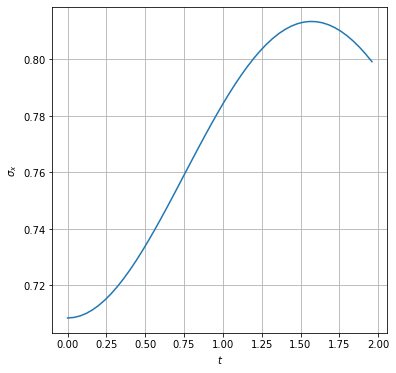

In [18]:
sigma_fig = pt.plane_plotter(t, sigma, x_label=r'$t$', y_label=r'$\sigma_x$')
sigma_axes = sigma_fig.gca()

pt.printing_text(sigma_fig, sigma_axes)

In [ ]:
sigma_fig.savefig(imgs_dir + "/sigma_oscillation_isotrop.jpeg", dpi=300, format='jpeg')

## Test of Algorithms from [2.]

The following tests are run like the example **4.3.I** (pg. 1689) in the above mentioned paper.

The only difference between our implementation of the algorithm and the implementation that can be found in [2.] is the choice of boundary condition. Though out this work we have chosen _periodic boundary conditions_ while in the paper the implementation of the algorithm is done with Dirichlet boundary conditions.

In [344]:
M = 16*8
N = 10000
x_range = [-8, 8]
y_range = [-4, 4]
gx = 1
gy = 4
saving_time = 50
potential = lambda x, y: 0.5*(gx**2*x**2 + gy**2*y**2)
psi0 = lambda x, y: (gx*gy)**(1/4) * np.exp(-(gx**2*x**2+gy**2*y**2)/2) / np.pi**(1/2)
beta = 200.
dt = 0.001
eps = 1

In [345]:
start_time = time.time()
t, X, Y, psi = gp.td_tssp_2d_pbc(M, N, saving_time, x_range, y_range, psi0, potential, dt, beta, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

[##############################] 100%
--- Evaluated in 31.09 seconds ---


Now with other paramethers ...

In [346]:
M_2 = 16*8
N = 10000
x_range = [-8, 8]
y_range = [-4, 4]
gx = 1
gy = 4
saving_time = 50
potential = lambda x, y: 0.5*(gx**2*x**2 + gy**2*y**2)
psi0 = lambda x, y: (gx*gy)**(1/4) * np.exp(-(gx**2*x**2+gy**2*y**2)/2) / np.pi**(1/2)
beta_2 = 100.
dt = 0.001
eps = 1

In [347]:
start_time = time.time()
t_2, X_2, Y_2, psi_2 = gp.td_tssp_2d_pbc(M_2, N, saving_time, x_range, y_range, psi0, potential, dt, beta_2, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

[##############################] 100%
--- Evaluated in 22.73 seconds ---


In [348]:
M_2 = 16*8
N = 10000
x_range = [-8, 8]
y_range = [-4, 4]
gx = 1
gy = 4
saving_time = 50
potential = lambda x, y: 0.5*(gx**2*x**2 + gy**2*y**2)
psi0 = lambda x, y: (gx*gy)**(1/4) * np.exp(-(gx**2*x**2+gy**2*y**2)/2) / np.pi**(1/2)
beta_3 = 50.
dt = 0.001
eps = 1

In [349]:
start_time = time.time()
t_3, X_3, Y_3, psi_3 = gp.td_tssp_2d_pbc(M_2, N, saving_time, x_range, y_range, psi0, potential, dt, beta_3, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

[##############################] 100%
--- Evaluated in 24.21 seconds ---


In [350]:
V = potential(X, Y)
x_spacing = (x_range[1] - x_range[0])/M
y_spacing = (y_range[1] - y_range[0])/M

V_2 = potential(X_2, Y_2)
x_spacing_2 = (x_range[1] - x_range[0])/M_2
y_spacing_2 = (y_range[1] - y_range[0])/M_2

E = np.empty(len(t))
mu_g = np.empty(len(t))
x_rms = np.empty(len(t))
y_rms = np.empty(len(t))

E_2 = np.empty(len(t_2))
mu_g_2 = np.empty(len(t_2))
x_rms_2 = np.empty(len(t_2))
y_rms_2 = np.empty(len(t_2))

E_3 = np.empty(len(t))
mu_g_3 = np.empty(len(t))
x_rms_3 = np.empty(len(t))
y_rms_3 = np.empty(len(t))

for i in range(len(t)):
    E[i] = np.abs(gp.energy_gpe(psi[i], V, beta, eps, x_spacing, y_spacing))
    mu_g[i] = gp.mu_gpe(psi[i], V, beta, eps, x_spacing, y_spacing)
    x_rms[i] = np.sqrt(gp.mean_value_2d(fx2, psi[i], x_range, y_range, M))
    y_rms[i] = np.sqrt(gp.mean_value_2d(fy2, psi[i], x_range, y_range, M))
    
    E_2[i] = np.abs(gp.energy_gpe(psi_2[i], V_2, beta_2, eps, x_spacing_2, y_spacing_2))
    mu_g_2[i] = gp.mu_gpe(psi_2[i], V_2, beta_2, eps, x_spacing_2, y_spacing_2)
    x_rms_2[i] = np.sqrt(gp.mean_value_2d(fx2, psi_2[i], x_range, y_range, M_2))
    y_rms_2[i] = np.sqrt(gp.mean_value_2d(fy2, psi_2[i], x_range, y_range, M_2))
    
    E_3[i] = np.abs(gp.energy_gpe(psi_3[i], V, beta_3, eps, x_spacing, y_spacing))
    mu_g_3[i] = gp.mu_gpe(psi_3[i], V, beta_3, eps, x_spacing, y_spacing)
    x_rms_3[i] = np.sqrt(gp.mean_value_2d(fx2, psi_3[i], x_range, y_range, M))
    y_rms_3[i] = np.sqrt(gp.mean_value_2d(fy2, psi_3[i], x_range, y_range, M))
    
t = t/dt
t_2 = t_2/dt
t_3 = t_3/dt
t_4 = t_4/dt

In [351]:
def plane_plotter(x_list, y_list, title='', x_label=r'$x$', y_label=r'$y$', log_x=False, log_y=False, show_plot=True, dark=False):
    if not isinstance(y_list, list):
        y_list = [y_list]

    if not isinstance(x_list, list):
        x_list = [x_list]

    if len(x_list) == 1:
        x_list = x_list * len(y_list)

    if len(x_list) != len(y_list):
        raise ValueError(
            'The number of elements for x_list and y_list should be the same or 1 for x_list.')
    
    fff = ['k-', 'k--', 'k-.', 'k:']
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()

    for i in range(len(x_list)):
        ax.plot(x_list[i], y_list[i], fff[i])

    ax.grid()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    title = ax.set_title(title)

    if dark:
        _darkizer(fig, ax, title)

    if log_x:
        ax.set_xscale('log')
    if log_y:
        ax.set_yscale('log')

    if show_plot:
        plt.show()

    return fig

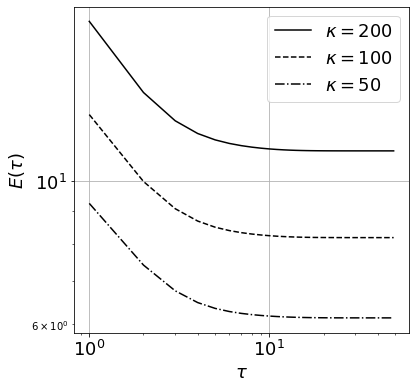

In [355]:
conv_E_fig = plane_plotter([t[1:int(len(t)/4)], t_2[1:int(len(t_2)/4)], t_3[1:int(len(t_3)/4)]], 
                              [E[1:int(len(t)/4)], E_2[1:int(len(t_2)/4)], E_3[1:int(len(t_3)/4)]], 
                              x_label=r'$\tau$', y_label=r'$E(\tau)$', show_plot=False)

conv_E_ax = conv_E_fig.gca()

for tick in conv_E_ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
for tick in conv_E_ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(18)
conv_E_ax.xaxis.label.set_fontsize(18)
conv_E_ax.yaxis.label.set_fontsize(18)
conv_E_ax.title.set_fontsize(18)

conv_E_ax.set_xscale('log')
conv_E_ax.set_yscale('log')

conv_E_ax.legend((r'$\kappa=200$', r'$\kappa=100$', r'$\kappa=50$', r'$\kappa=25$'), prop={'size': 18})

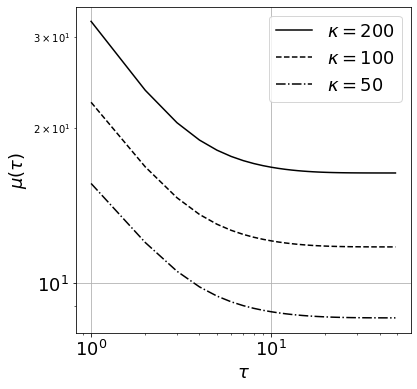

In [356]:
conv_mu_fig = plane_plotter([t[1:int(len(t)/4)], t_2[1:int(len(t_2)/4)], t_3[1:int(len(t_3)/4)]], 
                               [mu_g[1:int(len(t)/4)], mu_g_2[1:int(len(t_2)/4)], mu_g_3[1:int(len(t_3)/4)]], 
                               x_label=r'$\tau$', y_label=r'$\mu(\tau)$', show_plot=False)

conv_mu_ax = conv_mu_fig.gca()

for tick in conv_mu_ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
for tick in conv_mu_ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(18)
conv_mu_ax.xaxis.label.set_fontsize(18)
conv_mu_ax.yaxis.label.set_fontsize(18)
conv_mu_ax.title.set_fontsize(18)

conv_mu_ax.set_xscale('log')
conv_mu_ax.set_yscale('log')

conv_mu_ax.legend((r'$\kappa=200$', r'$\kappa=100$', r'$\kappa=50$', r'$\kappa=25$'), prop={'size': 18})

In [357]:
conv_E_fig.savefig(imgs_dir + "/E_convergence.jpeg", dpi=300, format='jpeg', bbox_inches='tight')
conv_mu_fig.savefig(imgs_dir + "/mu_convergence.jpeg", dpi=300, format='jpeg', bbox_inches='tight')

In [458]:
print("k=200\tE: {:.4f} \tmu: {:.4f} \tx_rms: {:.4f} \ty_rms: {:.4f}".format(E[-1], mu_g[-1], x_rms[-1], y_rms[-1]))
print("k=100\tE: {:.4f} \tmu: {:.4f} \tx_rms: {:.4f} \ty_rms: {:.4f}".format(E_2[-1], mu_g_2[-1], x_rms_2[-1], y_rms_2[-1]))
print("k=50\tE: {:.4f} \tmu: {:.4f} \tx_rms: {:.4f} \ty_rms: {:.4f}".format(E_3[-1], mu_g_3[-1], x_rms_3[-1], y_rms_3[-1]))

k=200	E: 11.1559 	mu: 16.3367 	x_rms: 2.2925 	y_rms: 0.6130
k=100	E: 8.1752 	mu: 11.7420 	x_rms: 1.9190 	y_rms: 0.5362
k=50	E: 6.1319 	mu: 8.5522 	x_rms: 1.6034 	y_rms: 0.4781


## Test of Algorithms from [3.]

The following tests are run like the example in the first page in the above mentioned paper.

In [359]:
M = 256
N = 5000
x_range = [-10, 10]
y_range = [-10, 10]
gx = 1.0
gy = 1.0
v = 2.0
w0, delt, r0 = 60.0, 3.0, 0.0

dt = 0.001
saving_time = 100
eps = 2
beta = 1000 # Notice that I put twice the value in the paper as later it is diveided by epsilon

The potential used is the following:
$$
V(x, y, t) = \frac{1}{2} (g_x^2  x^2 + g_y^2 y^2) + w_0 e^{- (x - r_0)^2 + (y - vt)^2}
$$
and the initial wavefunction:
$$
\psi(x, y) = \frac{\sqrt[4]{g_x g_y}}{\sqrt{\pi}}\: e^{\frac{1}{2} (g_x^2  x^2 + g_y^2 y^2)}
$$

In [360]:
# Notice that the potential is 1/2 instead of 1/4, maybe can discusse it later in more detail 
init_pot = lambda x, y: 0.5*(gx**2*x**2 + gy**2*y**2) + w0 * np.exp(-delt * ((x - r0)**2 + y**2))
potential_t = lambda x, y, t: 0.5*(gx**2*x**2 + gy**2*y**2) + w0 * np.exp(-delt * ((x - r0)**2 + (y - v*t)**2))
psi0 = lambda x, y: (gx*gy)**(1/4) * np.exp(-(gx**2*x**2 + gy**2*y**2)/2) / np.pi**(1/2)

To find the initial ground state we use the TSSP method to solve the time-dependant Gross-Pitaevskii equation.

In [361]:
start_time = time.time()
t, X, Y, psi = gp.td_tssp_2d_pbc(M, N, saving_time, x_range, y_range, psi0, init_pot, dt, beta, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

[##############################] 100%
--- Evaluated in 43.92 seconds ---


In [362]:
V = init_pot(X, Y)
x_spacing = (x_range[1] - x_range[0])/M
y_spacing = (y_range[1] - y_range[0])/M

En = np.empty(len(t))
for i in range(len(t)):
    En[i] = np.abs(gp.energy_gpe(psi[i], V, beta, eps, x_spacing, y_spacing))

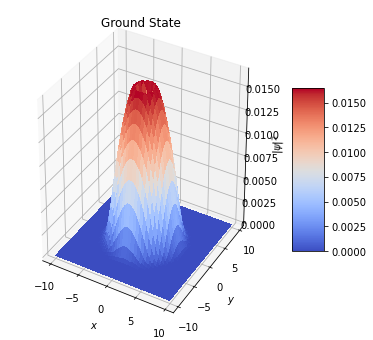

In [363]:
init_cond_gs = pt.surface_plotter(X, Y, np.abs(psi[-1])**2, title='Ground State', z_label=r'$|\psi|^2$', show_plot=False)

In [364]:
# make some variables to call this function
start_time = time.time()
t, X, T, psi_t = gp.ti_tssp_2d_pbc(M, 7000, 50, x_range, y_range, psi[-1], potential_t, dt, beta, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

[##############################] 100%
--- Evaluated in 75.29 seconds ---


Now we can plot the probability density at different times during the evolution and also the velocity field to spot vorticies.

In [432]:
def contour_plotter(X, Y, Z, levels=25, title='', x_label=r'$x$', y_label=r'$y$', values=False, show_plot=True, dark=False):
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()

    cp = ax.contour(X, Y, Z, levels, colors='k')
    #ax.clabel(cp, inline=2, fontsize=14, fmt='%1.1f')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    title = ax.set_title(title)

    if show_plot:
        plt.show()

    return fig

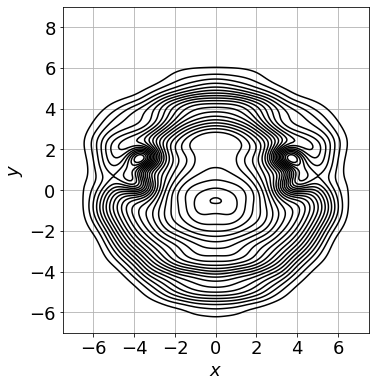

In [456]:
frames = [0, 20, 40, 60, 80, 100]

for frame in frames:
    contour_fig = contour_plotter(X, Y, 100*np.abs(psi_t[frame])**2, show_plot=False)
    axis_contour = contour_fig.gca()
    axis_contour.axis([-7.5,7.5,-7,9])
    axis_contour.set_aspect('equal')
    axis_contour.grid()

    # increase the size of ticks
    for tick in axis_contour.xaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
    for tick in axis_contour.yaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
    axis_contour.xaxis.label.set_fontsize(18)
    axis_contour.yaxis.label.set_fontsize(18)
    axis_contour.title.set_fontsize(18)
    
    contour_fig.savefig(imgs_dir + "/contour_vortices_BW_t={:.1f}s.jpeg".format(dt*saving_time*frame), dpi=300, format='jpeg')

5.7


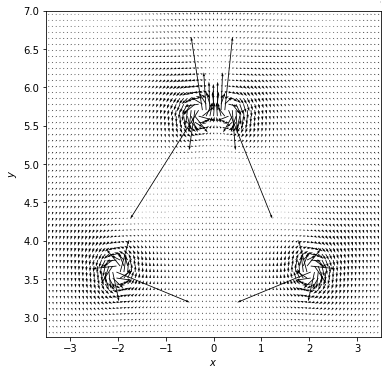

In [252]:
frame = 57

u, v = gp.veloc_2d(psi_t[frame], x_spacing, y_spacing)
veloc_fig = pt.quiver_plotter(X, Y, [u, v], plot_range=[-3.5,3.5,2.75,7.0])
axis_veloc = veloc_fig.gca()

for tick in axis_veloc.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
for tick in axis_veloc.yaxis.get_major_ticks():
                tick.label.set_fontsize(18)
axis_veloc.xaxis.label.set_fontsize(18)
axis_veloc.yaxis.label.set_fontsize(18)
axis_veloc.title.set_fontsize(18)

In [253]:
veloc_fig.savefig(imgs_dir + "/velocity_vortex.jpeg", dpi=300, format='jpeg')

In [460]:
def _crop_array_idxs(array, val_min, val_max):
    flag_min = True
    flag_max = True
    l = len(array)

    for i, elem in enumerate(array):
        if flag_min:
            if elem >= val_min:
                idx_min = i
                flag_min = False
        if flag_max:
            if array[l - 1 - i] <= val_max:
                idx_max = l - 1 - i
                flag_max = False
        if not flag_max and not flag_min:
            break

    if flag_min or flag_max:
        raise RuntimeError('Indeces not found.')

    return idx_min, idx_max

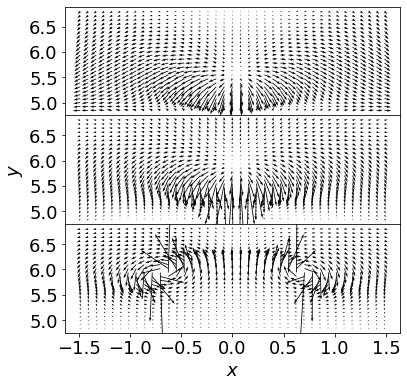

In [245]:
x_max = 1.5
x_min = -1.5
y_max = 6.8
y_min = 4.8

idx_x_min, idx_x_max = _crop_array_idxs(X[:, 0], x_min, x_max)
idx_y_min, idx_y_max = _crop_array_idxs(Y[0, :], y_min, y_max)

X_c = X[idx_x_min: idx_x_max + 1, idx_y_min: idx_y_max + 1]
Y_c = Y[idx_x_min: idx_x_max + 1, idx_y_min: idx_y_max + 1]

frames = [50, 55, 60]

fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharex=True, gridspec_kw = {'hspace':0})

for i, frame in enumerate(frames):
    u, v = gp.veloc_2d(psi_t[frame], x_spacing, y_spacing)
    
    u = u[idx_x_min: idx_x_max + 1, idx_y_min: idx_y_max + 1]
    v = v[idx_x_min: idx_x_max + 1, idx_y_min: idx_y_max + 1]
    
    axes[i].quiver(X_c, Y_c, u/500.0, v/500.0, pivot='tail')
    
    for tick in axes[i].xaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
    for tick in axes[i].yaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
    
axes[2].set_xlabel(r'$x$', fontsize=18)
axes[1].set_ylabel(r'$y$', fontsize=18)

fig.savefig(imgs_dir + "/formation_vortex.jpeg", dpi=300, format='jpeg')

A useeful analysis that can be done on this data is seeeing the topological invariants of the vorticies. This can show the presence of the vorticies and can be useful to "spot" the critical velocity for which one has vortex formation.
One can evaluate two things:
- The maximum phase difference for two nearby points in the y axis. (Approach chose in [3.]) 
- The winding number around one vortex

The data for this case have been imported.

In [314]:
theta = np.load(data_dir + "/theta.npy")

v1 = np.load(data_dir + "/phase_vortex1.npy")
ps_v1 = np.load(data_dir + "/partial_sum_v1.npy")

v3 = np.load(data_dir + "/phase_radius3.npy")
ps_v3 = np.load(data_dir + "/partial_sum_radius3.npy")

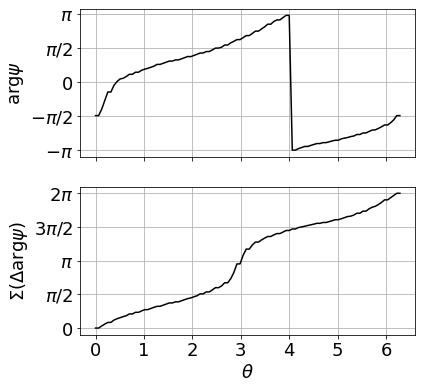

In [342]:
fi, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

axs[0].plot(theta, v1, 'k')
axs[1].plot(theta, ps_v1, 'k')

axs[0].grid()
axs[1].grid()

axs[0].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axs[0].set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
axs[1].set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs[1].set_yticklabels([r'0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$',])

for a in axs:
    for tick in a.xaxis.get_major_ticks():
                        tick.label.set_fontsize(18)

    for tick in a.yaxis.get_major_ticks():
                        tick.label.set_fontsize(18)
    
axs[0].set_ylabel(r'$\arg \psi$', fontsize=18)
axs[1].set_ylabel(r'$\Sigma(\Delta \arg \psi)$', fontsize=18)
axs[1].set_xlabel(r'$\theta$', fontsize=18)

fi.savefig(imgs_dir + "/one_single_vortex.jpeg", dpi=300, format='jpeg', bbox_inches='tight')

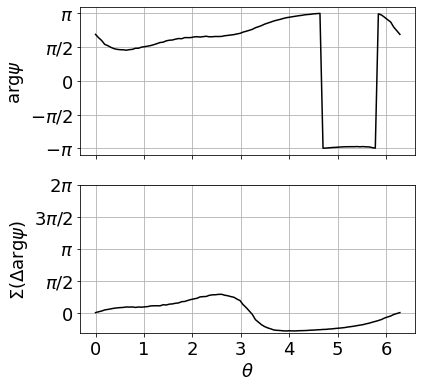

In [343]:
fi, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

axs[0].plot(theta, v3, 'k')
axs[1].plot(theta, ps_v3, 'k')

axs[0].grid()
axs[1].grid()

axs[0].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axs[0].set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
axs[1].set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs[1].set_yticklabels([r'0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$',])

for a in axs:
    for tick in a.xaxis.get_major_ticks():
                        tick.label.set_fontsize(18)

    for tick in a.yaxis.get_major_ticks():
                        tick.label.set_fontsize(18)
    
axs[0].set_ylabel(r'$\arg \psi$', fontsize=18)
axs[1].set_ylabel(r'$\Sigma(\Delta \arg \psi)$', fontsize=18)
axs[1].set_xlabel(r'$\theta$', fontsize=18)

fi.savefig(imgs_dir + "/pair_vortexes.jpeg", dpi=300, format='jpeg', bbox_inches='tight')

## References

[1.] [**Numerical Solution of the Gross-Pitaevskii Equation for Bose-Einstein Condensation**](https://arxiv.org/abs/cond-mat/0303239), Weizhu Bao, Dieter Jaksch, Peter A. Markowich

[2.] [**Computing the ground state solution of Bose-Einstein condensates by a normalized gradient flow**](https://arxiv.org/abs/cond-mat/0303241), Weizhu Bao, Qiang Du

[3.] [**Vortex Formation in Dilute Inhomogeneous Bose-Einstein Condensates**](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.80.3903), B. Jackson, J. F. McCann, and C. S. Adams